In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores_full

from transformers import ViTModel, AutoModel

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-vision-models/full-models/DINO-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [3]:
path = ["encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'DINO small (l = 12, d = 384, h = 6, patches = 8 ; 21M parameters)'
dh = 64
patch = 8
l = 12
d = 384
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vits8')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-small-8'] = [l, d, h, dh, sym_scores]

'DINO base (l = 12, d = 768, h = 12, patches = 8 ; 85M parameters)'
dh = 64
patch = 8
l = 12
d = 768
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vitb8')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-base-8'] = [l, d, h, dh, sym_scores]

'DINO small (l = 6, d = 384, h = 6, patches = 16 ; 21M parameters)'
dh = 64
patch = 16
l = 12
d = 384
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vits16')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-small-16'] = [l, d, h, dh, sym_scores]

'DINO base (l = 12, d = 768, h = 12, patches = 16 ; 85M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vitb16')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-base-16'] = [l, d, h, dh, sym_scores]

'DINOv2 small (l = 6, d = 384, h = 6 ; 22.1M parameters)'
dh = 64
l = 12
d = 384
h = d // dh
model = AutoModel.from_pretrained("facebook/dinov2-small")
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINOv2-small'] = [l, d, h, dh, sym_scores]

'DINOv2 base (l = 12, d = 768, h = 12 ; 86.6M parameters)'
dh = 64
l = 12
d = 768
h = d // dh
model = AutoModel.from_pretrained("facebook/dinov2-base")
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINOv2-base'] = [l, d, h, dh, sym_scores]

'DINOv2 large (l = 24, d = 1024, h = 16 ; 304M parameters)'
dh = 64
l = 24
d = 1024
h = d // dh
model = AutoModel.from_pretrained("facebook/dinov2-large")
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINOv2-large'] = [l, d, h, dh, sym_scores]

'DINOv2 giant (l = 40, d = 1536, h = 24 ; 1140M parameters)'
dh = 64
l = 40
d = 1536
h = d // dh
model = AutoModel.from_pretrained("facebook/dinov2-giant")
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINOv2-giant'] = [l, d, h, dh, sym_scores]

KeyboardInterrupt: 

In [4]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

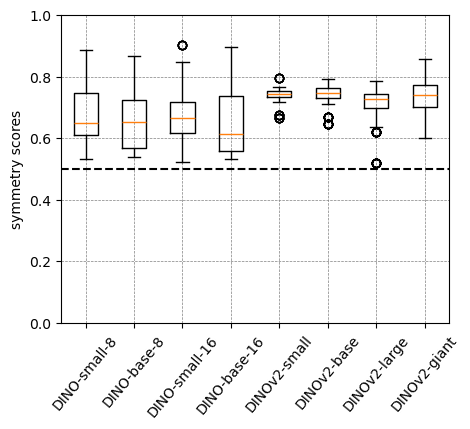

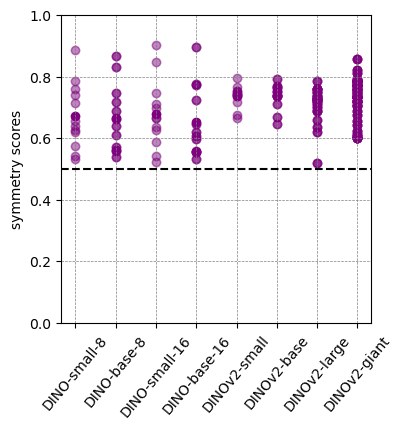

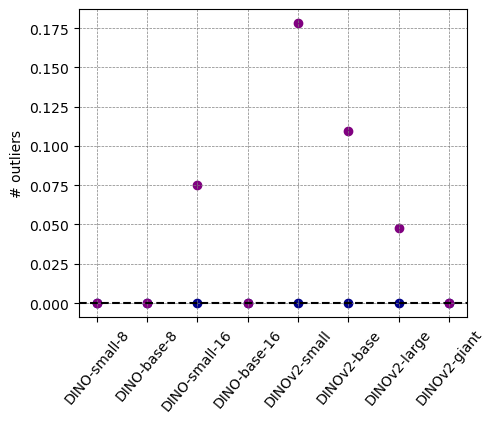

In [5]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)